In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa import stattools
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 6)
import numpy
from math import sqrt

In [2]:
delhi = pd.read_csv('delhi.csv', header = None, parse_dates=[[0,1]], infer_datetime_format=True)

In [3]:
delhi.head()

,0_1,2
0,2017-12-24 00:00:00,1793.03
1,2017-12-24 00:05:00,1781.27
2,2017-12-24 00:10:00,1757.10
3,2017-12-24 00:15:00,1730.53
4,2017-12-24 00:20:00,1716.35


In [4]:
delhi.columns = ['datetime', 'load']

In [5]:
delhi.index = delhi['datetime']

In [6]:
delhi = delhi.drop(columns = ['datetime'])

In [7]:
delhi.head()

,load
datetime,
2017-12-24 00:00:00,1793.03
2017-12-24 00:05:00,1781.27
2017-12-24 00:10:00,1757.10
2017-12-24 00:15:00,1730.53
2017-12-24 00:20:00,1716.35


In [8]:
# delhi = delhi.apply(lambda x : (x-x.mean())/(x.max()-x.min()))

In [9]:
# (delhi[delhi.index.minute==30] or [delhi.index.minute==0])

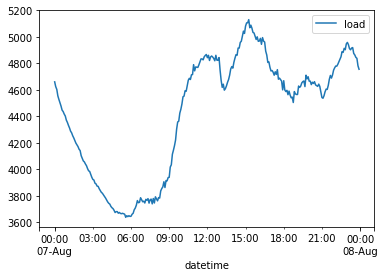

In [10]:
delhi['2018-08-07'].plot()
plt.rcParams['figure.figsize'] = (15, 6)
plt.show()

In [11]:
# r = delhi.rolling(window = 12*24)

In [12]:
# delhi['load'].plot(color = 'blue')
# r.mean()['load'].plot(color = 'red')

In [13]:
# delhi['load'].plot(color = 'blue')
# r.max()['load'].plot(color = 'red')

In [14]:
# delhi['load'].expanding(min_periods = 50).mean().plot()
# data['electricity_consumption'].expanding(min_periods = 720).mean().plot()

In [15]:
delhi.tail()

,load
datetime,
2018-08-21 23:35:00,5802.66
2018-08-21 23:40:00,5772.58
2018-08-21 23:45:00,5740.85
2018-08-21 23:50:00,5733.31
2018-08-21 23:55:00,5713.83


In [16]:
# plt.plot(delhi['load'][0:12*24])

In [17]:
# plt.plot(stattools.acf(delhi['load'], nlags = 12*24*3))

In [18]:
# plt.plot(stattools.pacf(delhi['load'], nlags = 12*24*4))

In [19]:
delhi = delhi.asfreq(freq='H', method='bfill')

In [20]:
delhi = delhi['2018-08-17':]

In [21]:
# import itertools
# p=d=q =  range(0,2)
# pdq = list(itertools.product(p,d,q))
# print(pdq)

In [22]:
# seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [23]:
# delhi.index = pd.to_datetime(delhi.index)

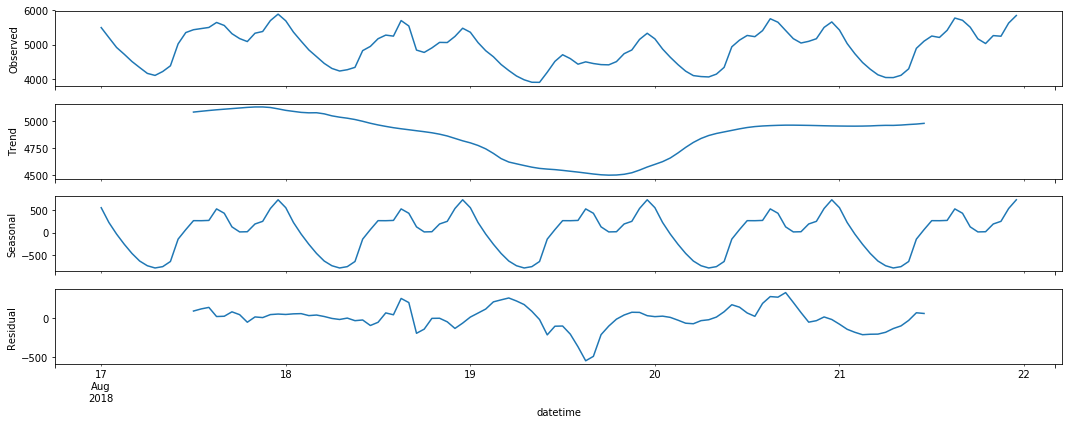

In [24]:
plt.rcParams['figure.figsize'] = (15, 6)
decompfreq = 24 #daily freq
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(delhi['2018-08':], freq=decompfreq, model='aditive')
result.plot()
plt.show()

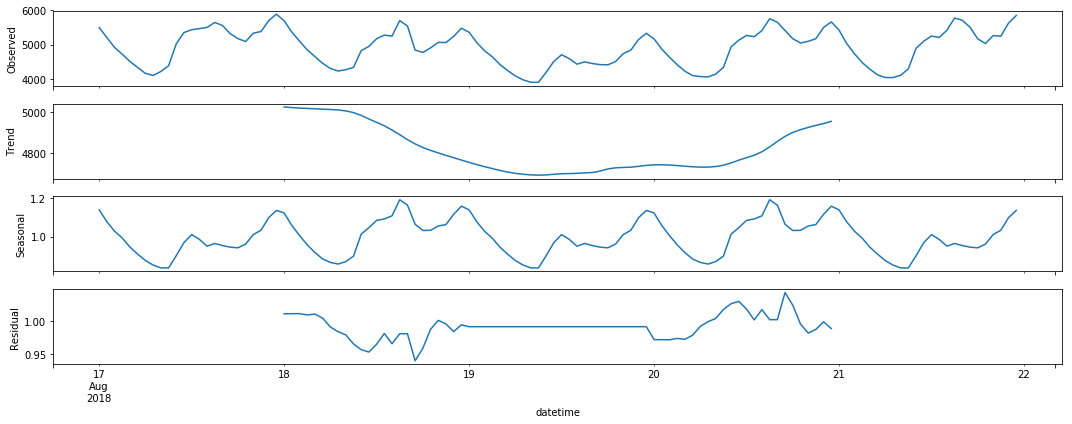

In [25]:
plt.rcParams['figure.figsize'] = (15, 6)
decompfreq = 48 #daily freq
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(delhi['2018-08':], freq=decompfreq, model='multiplicitive')
result.plot()
plt.show()

In [26]:
# import warnings
# import statsmodels.api as sm
# warnings.filterwarnings("ignore") # specify to ignore warning messages

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(delhi,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             results = mod.fit()

#             print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             print("nhi")
#             continue

In [27]:
# from pyramid.arima import auto_arima
# stepwise_model = auto_arima(delhi, start_p=1, start_q=1,
#                            max_p=3, max_q=3, m=12,
#                            start_P=0, seasonal=True,
#                            d=1, D=1, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)
# print(stepwise_model.aic())

In [28]:
mod = sm.tsa.statespace.SARIMAX(delhi,
                                order=(0,0,0),
                                seasonal_order=(0,0,1,24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L24   -1066.1934   8982.528     -0.119      0.906   -1.87e+04    1.65e+04
sigma2        20.5177    350.610      0.059      0.953    -666.665     707.700


/home/eee/ug/15084005/anaconda3/envs/ml/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [29]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                            
================================================================================
Dep. Variable:                     load   No. Observations:                  120
Model:             SARIMAX(0, 0, 1, 24)   Log Likelihood                -942.256
Date:                  Mon, 27 Aug 2018   AIC                           1888.512
Time:                          19:11:26   BIC                           1893.620
Sample:                      08-17-2018   HQIC                          1890.576
                           - 08-21-2018                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L24   -1066.1934   8982.528     -0.119      0.906   -1.87e+04    1.65e+04
sigma2        20.5177    350.610      0.059      0.953    -666.665     707.700
===================================================================================
Ljung-Box (Q):                      368.99   Jarque-Bera (JB):                 4.99
Prob(Q):                              0.00   Prob(JB):                         0.08
Heteroskedasticity (H):               1.07   Skew:                            -0.10
Prob(H) (two-sided):                  0.84   Kurtosis:                         1.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
from statsmodels.tsa.arima_model import ARIMAResults

In [35]:
import statsmodels
statsmodels.__version__ 

'0.9.0'

In [36]:
results.save('model1.pkl')

In [38]:
loaded = ARIMAResults.load('model1.pkl')

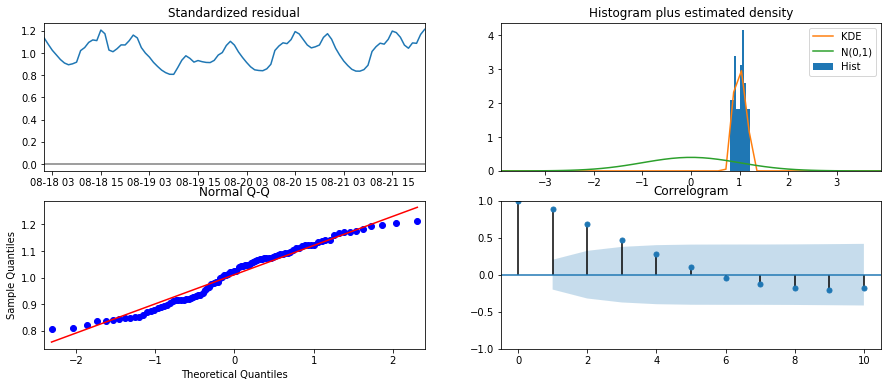

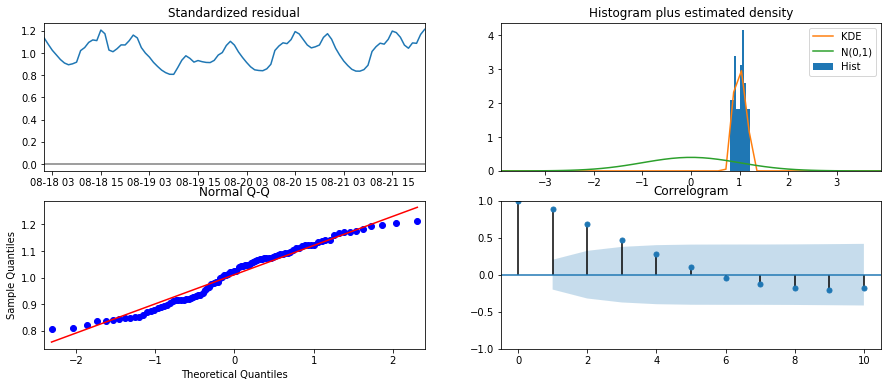

In [39]:
loaded.plot_diagnostics()

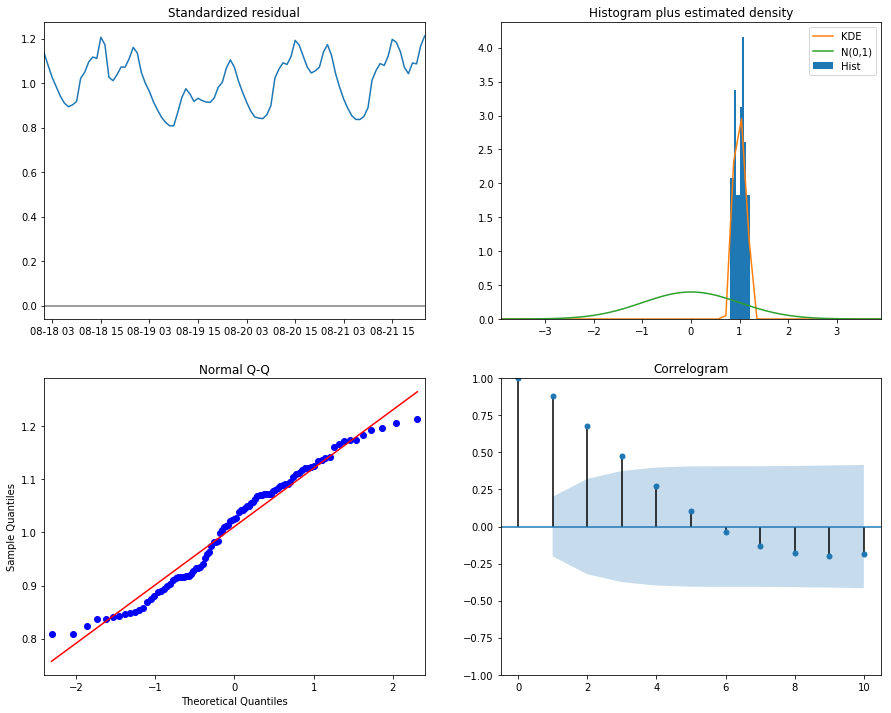

In [32]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [58]:
pred = results.get_prediction(start=pd.to_datetime('2018-08-21 00:00:00'), dynamic=False)
pred_ci = pred.conf_int()

In [59]:
# pred_ci

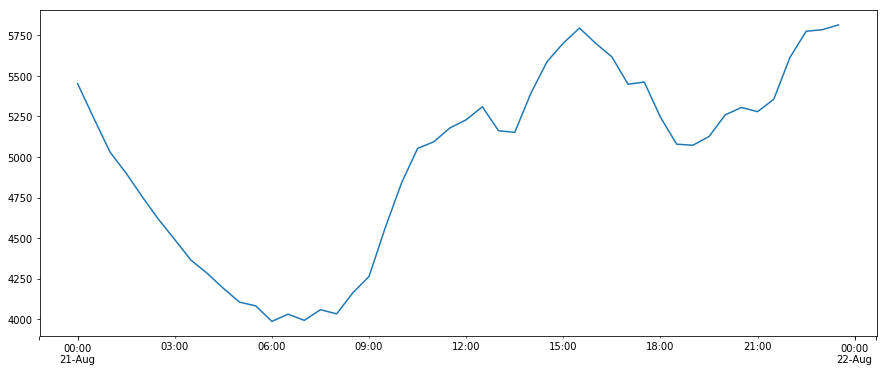

In [60]:
p = pred.predicted_mean.plot(figsize=(15,6))

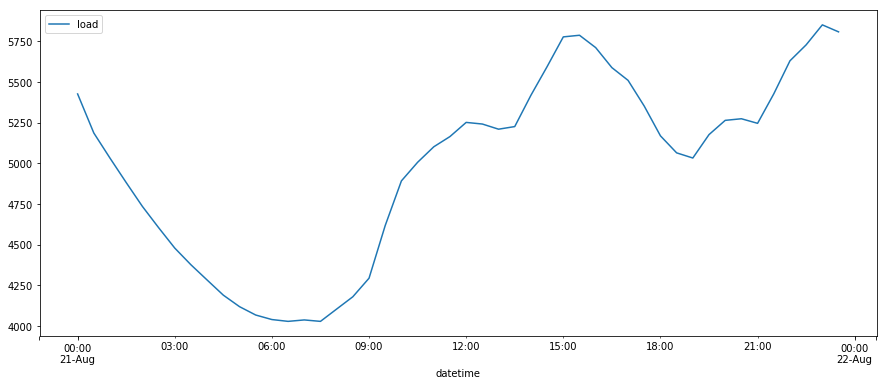

In [61]:
ax = delhi['2018-08-21':].plot(figsize=(15,6))

In [62]:
pr = pred.predicted_mean
axr = delhi['2018-08-21':]

In [63]:
# print(pr)

In [64]:
# print(axr)

In [65]:
# ax

In [66]:
# ax = delhi['2018-08-01':'2018-08-02'].plot(label='observed', figsize=(15,6))
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

# # ax.fill_between(pred_ci.index,
# #                 pred_ci.iloc[:, 0],
# #                 pred_ci.iloc[:, 1], color='k', alpha=.2)

# ax.set_xlabel('Date')
# ax.set_ylabel('Electricity Production')
# plt.legend()

# plt.show()

In [67]:
# type(pr), type(axr)

In [68]:
# pr

In [69]:
axr.head()

,load
datetime,
2018-08-21 00:00:00,5425.76
2018-08-21 00:30:00,5185.79
2018-08-21 01:00:00,5031.29
2018-08-21 01:30:00,4881.22
2018-08-21 02:00:00,4734.64


In [70]:
from math import sqrt 
print(sqrt(((pred.predicted_mean - numpy.squeeze(delhi['2018-08-21':]))**2).mean()))

42.205989954793644


In [71]:
import numpy
y_forecasted = pred.predicted_mean
y_truth = delhi['2018-08-21':]
# print(y_truth.values)
# Compute the mean square error
mse = ((numpy.squeeze(y_forecasted.values) - numpy.squeeze(y_truth.values)) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1781.35


In [72]:
# hlwa = results.get_forecast(480)

In [73]:
# delhi = delhi.asfreq(freq='300S', method='bfill')

In [74]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps = 48)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [75]:
pred_ci

,lower load,upper load
2018-08-22 00:00:00,5542.360553,5800.255047
2018-08-22 00:30:00,5283.275694,5691.111315
2018-08-22 01:00:00,5080.397708,5612.951186
2018-08-22 01:30:00,4899.231966,5539.031734
2018-08-22 02:00:00,4728.339339,5462.527072
2018-08-22 02:30:00,4571.554669,5390.424656
2018-08-22 03:00:00,4423.464617,5319.513843
2018-08-22 03:30:00,4279.678906,5246.966323
2018-08-22 04:00:00,4154.242884,5187.955404
2018-08-22 04:30:00,4031.254415,5127.410704


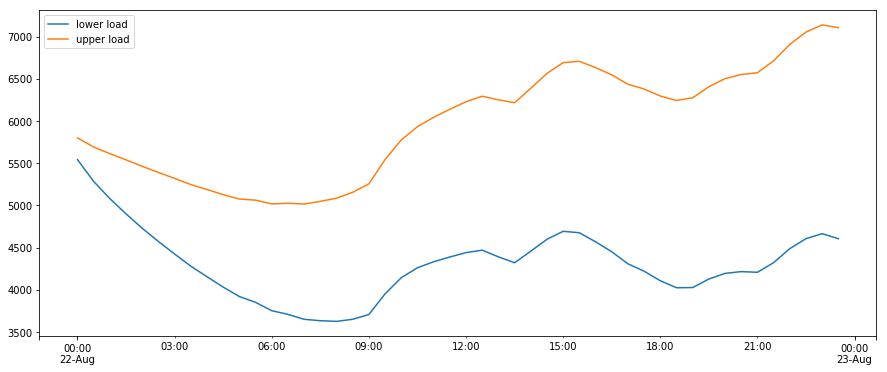

In [76]:
pred_ci.plot()

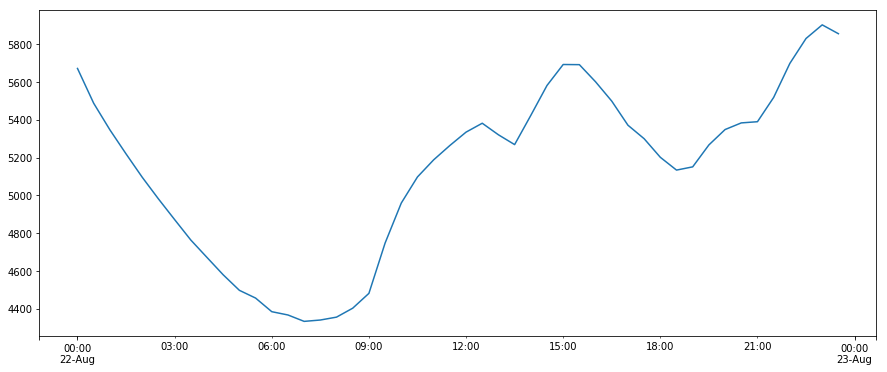

In [77]:
pred_uc.predicted_mean['2018-08-22'].plot(label='Forecast')

In [120]:
prediction = pred_uc.predicted_mean['2018-08-22']

In [111]:
d = pd.read_csv('22-08-2018.csv', header = None, parse_dates=[[0]], infer_datetime_format=True)

In [112]:
d.columns = ['datetime','load' ]

In [113]:
d.index = d['datetime']

In [114]:
d = d.drop(columns = ['datetime'])

In [119]:
actual = d.asfreq(freq='30T', method='bfill')

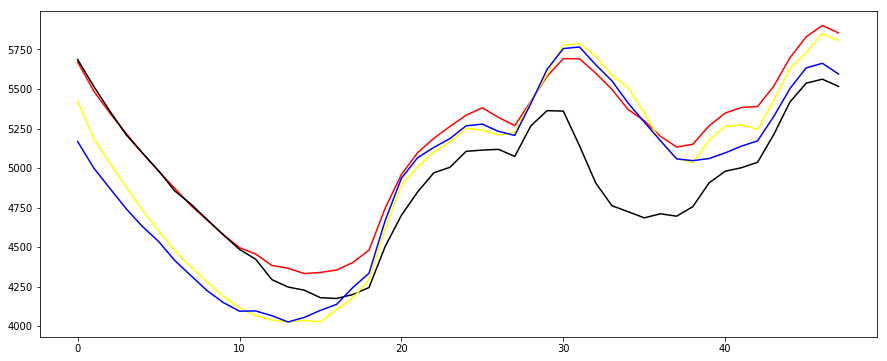

In [123]:
plt.plot(prediction.values, color='red', label='prediction')
plt.plot(actual.values, color='black', label='actual')
plt.plot(delhi['2018-08-21'].values, color='yellow')
plt.plot(delhi['2018-08-20'].values, color='blue')